<img src = "https://images2.imgbox.com/c1/79/4H1V1tSO_o.png" width="1200">

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#nomalizing data to its std (x_new= x/std(x))
from scipy.cluster.vq import whiten

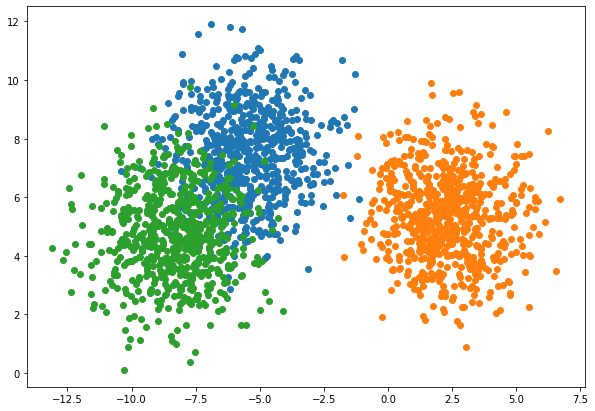

In [217]:
# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_blobs
from matplotlib import pyplot
fig= plt.figure(figsize=(10,7))
# define dataset
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=2000, centers=3, n_features=5,cluster_std=1.5, random_state=5)
# create scatter plot for samples from each class
for class_value in range(3):
# get row indexes for samples with this class
    row_ix = where(y == class_value)
# create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

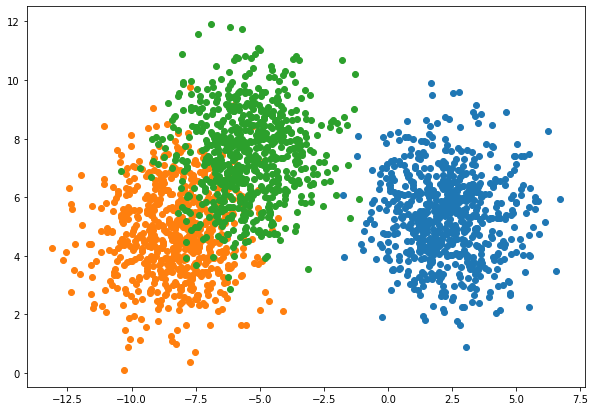

In [218]:
from sklearn.cluster import KMeans
from numpy import unique
from numpy import where
fig= plt.figure(figsize=(10,7))
# define the model
model = KMeans(n_clusters=3)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

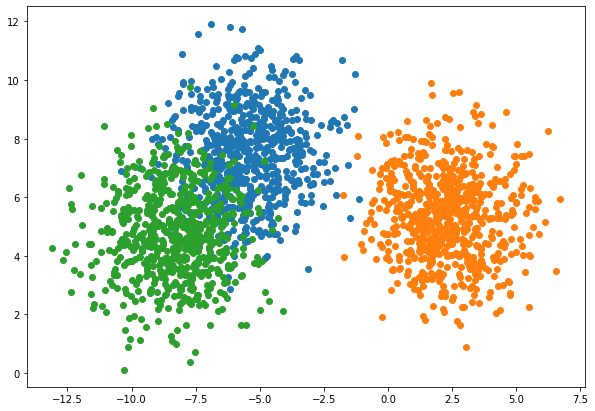

In [228]:
from sklearn.cluster import MeanShift
fig= plt.figure(figsize=(10,7))
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

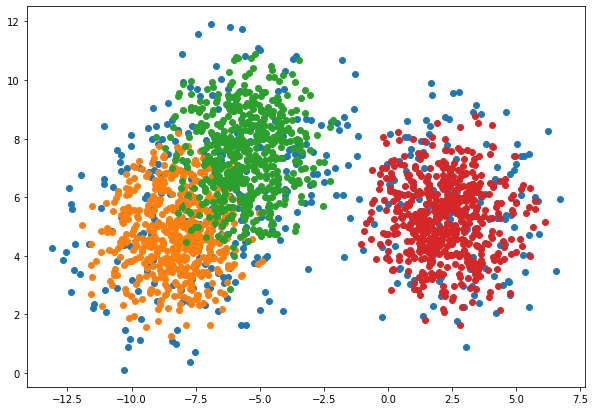

In [229]:
from sklearn.cluster import DBSCAN
fig= plt.figure(figsize=(10,7))
model = DBSCAN(eps=1.8, min_samples=10)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

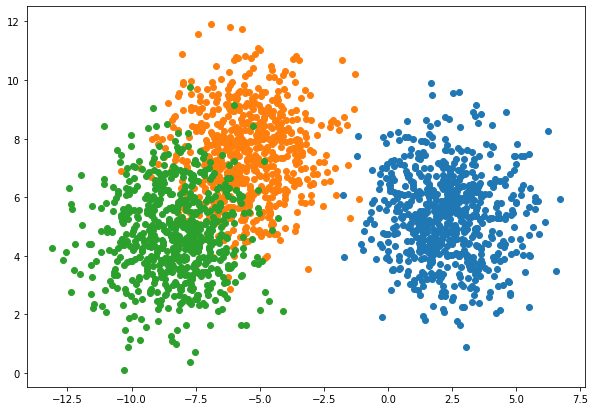

In [230]:
from sklearn.mixture import GaussianMixture
fig= plt.figure(figsize=(10,7))
# define the model
model = GaussianMixture(n_components=3)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

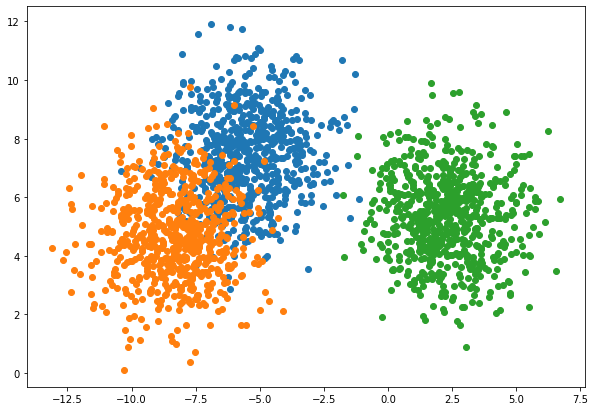

In [233]:
from sklearn.cluster import AgglomerativeClustering
fig= plt.figure(figsize=(10,7))
model = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

## creating a distance matrix using linkage

In [ ]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function
distance_matrix = linkage(data[['x_scaled', 'y_scaled']], 
                          method = 'ward', metric = 'euclidean') # method = 'single'/'complete'

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, 
                                       criterion='maxclust')

# Wholesale customers

In [268]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [269]:
# reading the data and looking at the first five rows of the data
df=pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [270]:
# statistics of the data
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [283]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# statistics of scaled data
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [272]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(df_scaled)

KMeans(n_clusters=2)

In [273]:
# inertia on the fitted data
kmeans.inertia_

2599.3855593561393

Text(0, 0.5, 'Inertia')

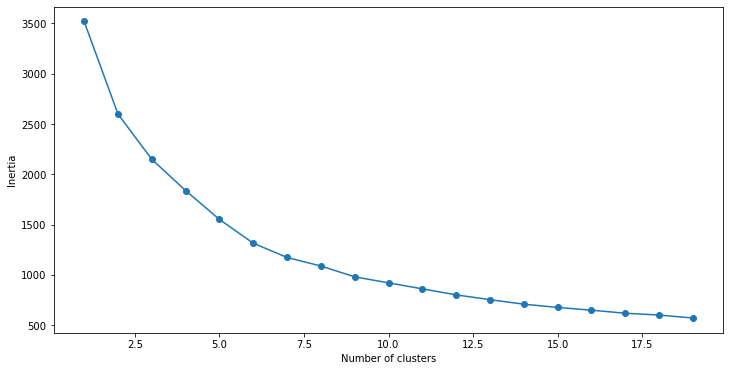

In [287]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [288]:
# k means using 6 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 6, init='k-means++')
kmeans.fit(df_scaled)
pred = kmeans.predict(df_scaled)

In [293]:
df_final = pd.DataFrame(df)
df_final['cluster'] = pred
df_final['cluster'].value_counts()

3    172
2    124
0     86
1     46
4     11
5      1
Name: cluster, dtype: int64

In [294]:
df_final[df_final['cluster']==0]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
198,1,1,11686,2154,6824,3527,592,697,0
199,1,1,9670,2280,2112,520,402,347,0
202,1,1,25203,11487,9490,5065,284,6854,0
203,1,1,583,685,2216,469,954,18,0
204,1,1,1956,891,5226,1383,5,1328,0
...,...,...,...,...,...,...,...,...,...
332,1,2,22321,3216,1447,2208,178,2602,0
336,1,2,13970,1511,1330,650,146,778,0
337,1,2,9351,1347,2611,8170,442,868,0
338,1,2,3,333,7021,15601,15,550,0


## creating a dendrogram in scipy

In [26]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

In [45]:
df_stock = pd.read_csv('company-stock-movements-2010-2015-incl.csv')
df_stock.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [46]:
companies = df_stock.iloc[:,0].to_list()
movements = df_stock.drop(df_stock.columns[0], axis=1).values

In [47]:
movements

array([[ 5.8000000e-01, -2.2000500e-01, -3.4099980e+00, ...,
        -5.3599620e+00,  8.4001900e-01, -1.9589981e+01],
       [-6.4000200e-01, -6.5000000e-01, -2.1000100e-01, ...,
        -4.0001000e-02, -4.0000200e-01,  6.6000000e-01],
       [-2.3500060e+00,  1.2600090e+00, -2.3500060e+00, ...,
         4.7900090e+00, -1.7600090e+00,  3.7400210e+00],
       ...,
       [ 4.3000100e-01,  2.2999600e-01,  5.7000000e-01, ...,
        -2.6000200e-01,  4.0000100e-01,  4.8000300e-01],
       [ 9.0000000e-02,  1.0000000e-02, -8.0000000e-02, ...,
        -3.0000000e-02,  2.0000000e-02, -3.0000000e-02],
       [ 1.5999900e-01,  1.0001000e-02,  0.0000000e+00, ...,
        -6.0001000e-02,  2.5999800e-01,  9.9998000e-02]])

In [48]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

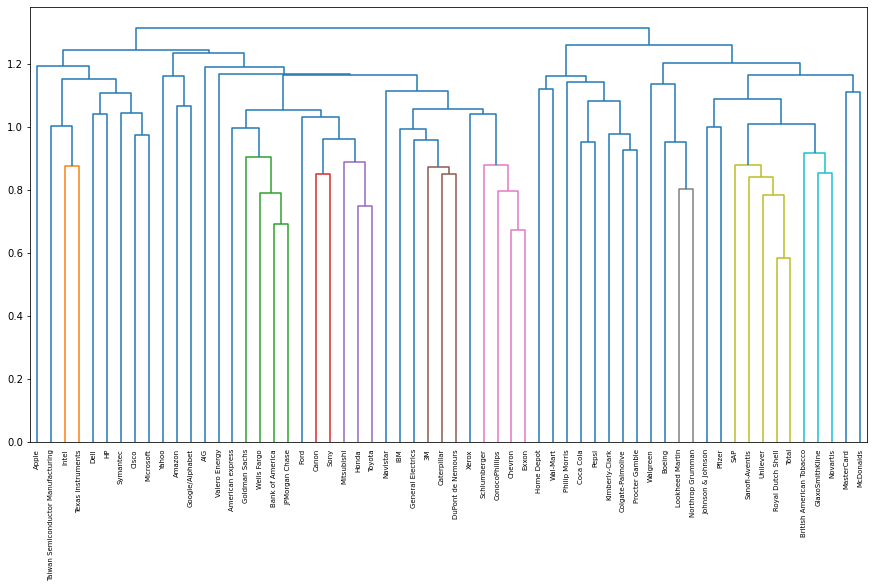

In [76]:
# set the fig size
fig= plt.figure(figsize=(15,8))

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=7
            )
plt.show()

## Extracting the cluster labels

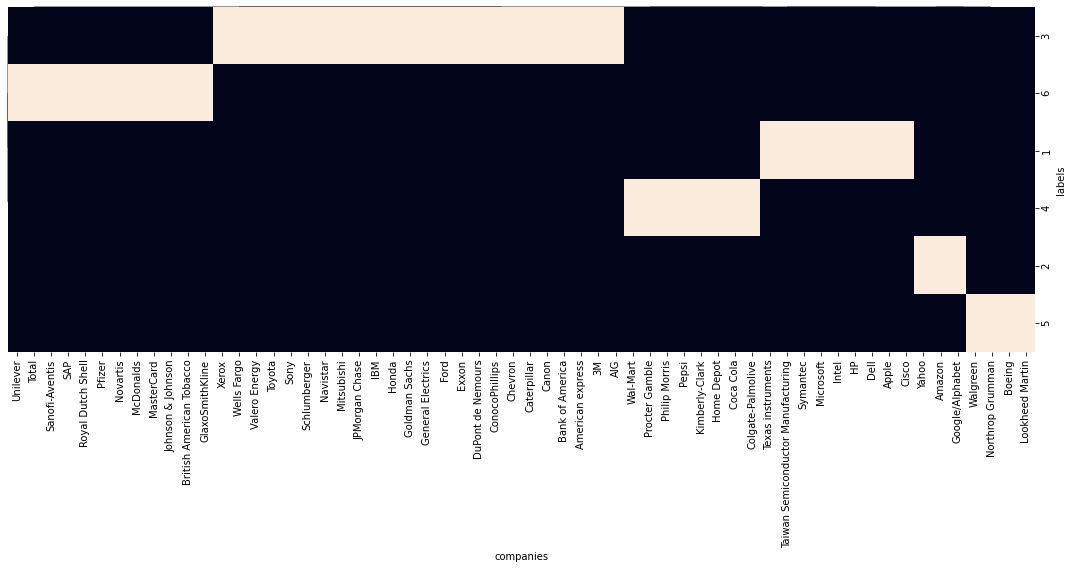

In [88]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 1.2, criterion='distance' )

# Create a DataFrame with labels and companies as columns: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['companies'])

# transformar uma crosstab em um cluster map
sns.clustermap(ct, figsize=(15, 8), cbar_pos=None, dendrogram_ratio=0.001)

## Extraindo dados do cluster hierarquico

In [60]:
df[df['labels'] == 1]

,labels,companies
0,1,Apple
11,1,Cisco
14,1,Dell
22,1,HP
24,1,Intel
33,1,Microsoft
47,1,Symantec
50,1,Taiwan Semiconductor Manufacturing
51,1,Texas instruments


## K-Means (generate cluster centers)

In [ ]:
kmeans(obs, k_or_guess, iter, thres, check_infinite)
'''
obs : standardized observations
k_or_guess : number of clusters
iter : number ofiterations (default: 20)
thres :threshold (default: 1e-05)
check_finite : whether to check if observations contain only nite numbers (default: True)
Returns two objects: cluster centers, distortion'''


## Generate cluster labels

In [ ]:
vq(obs, code_book, check_finite=True)
'''
obs : standardized observations
code_book : cluster centers
check_finite : whether to check if observations contain only nite numbers (default: True)
Returns two objects: a list of cluster labels, a list of distortions'''

#distortions:
'''
kmeans returns a single value of distortions
vq returns a list of distortions.'''

In [ ]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

## Elbow method

In [ ]:
# Declaring variables for use
distortions = []
num_clusters = range(2, 7)

# Populating distortions for various clusters
for i in num_clusters:
    centroids, distortion = kmeans(df[['scaled_x', 'scaled_y']], i)
    distortions.append(distortion)

# Plotting elbow plot data
elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters,
                                'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions',
             data = elbow_plot_data)
plt.show()

In [ ]:
#showing scaled x original data
plt.plot(data, label='original')
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

---